<a href="https://colab.research.google.com/github/beve0x/Clustering_supply_chain/blob/main/Supply_Chain_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the datasets
dataset2 = pd.read_csv('/content/drive/My Drive/dataset2.csv')


In [ ]:
import pandas as pd

# Swap the names of 'SHIP_FROM_LOC_CD' and 'SHIP_TO_LOC_CD' in dataset1
dataset2.rename(columns={'SHIP_FROM_LOC_CD': 'TEMP', 'SHIP_TO_LOC_CD': 'SHIP_FROM_LOC_CD'}, inplace=True)
dataset2.rename(columns={'TEMP': 'SHIP_TO_LOC_CD'}, inplace=True)

# Convert currency columns to floats
dataset2['L_CHG_AMT'] = pd.to_numeric(dataset2['L_CHG_AMT'].replace('[\$,]', '', regex=True))
dataset2['F_CHG_AMT'] = pd.to_numeric(dataset2['F_CHG_AMT'].replace('[\$,]', '', regex=True), errors='coerce')

# Convert dates to datetime format
dataset2['ACT_SHP_DT'] = pd.to_datetime(dataset2['ACT_SHP_DT'])

# Ensure 'WEIGHT_LB' and 'MILEAGE' are numeric (assuming they're formatted correctly in the source)
# If there are formatting issues, similar conversion as for currency columns can be applied

# Check for any remaining missing values and decide on a strategy for each column
missing_values = dataset2.isnull().sum()

# Display the clean dataset and missing values information
print(dataset2.head())
print("\nMissing values per column:\n", missing_values)


   INDEX ACT_SHP_DT PRODUCT_ID SHIP_TO_LOC_CD SHIP_FROM_LOC_CD  L_CHG_AMT  \
0      1 2021-01-08        M10             F5             D763       2086   
1      2 2021-01-08        M10             F5             D763       3978   
2      3 2021-01-08        M10             F5             D528       2700   
3      4 2021-01-11        M10             F5             D528       4199   
4      5 2021-01-12        M10             F5             D108       4168   

   F_CHG_AMT  WEIGHT_LB   MILEAGE   
0      214.0      9,444       983   
1      376.0     87,021       983   
2      261.0      9,740     1,200   
3      457.0     87,012     1,200   
4      455.0     86,203     1,191   

Missing values per column:
 INDEX                0
ACT_SHP_DT           0
PRODUCT_ID           0
SHIP_TO_LOC_CD       0
SHIP_FROM_LOC_CD     0
L_CHG_AMT            0
F_CHG_AMT           44
 WEIGHT_LB           0
 MILEAGE             0
dtype: int64


<ipython-input-86-139da82b3701>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset2['ACT_SHP_DT'] = pd.to_datetime(dataset2['ACT_SHP_DT'])


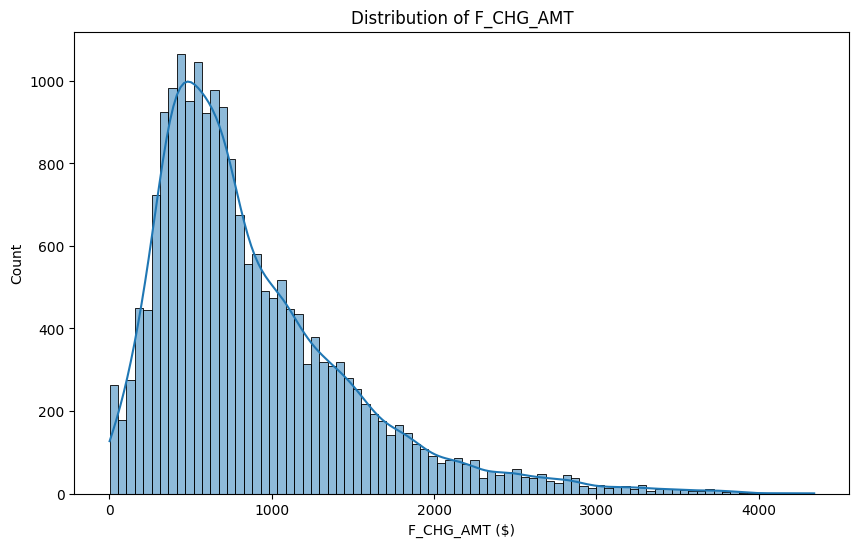

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset2' is your DataFrame and 'F_CHG_AMT' is the column to inspect
# Plot the distribution of 'F_CHG_AMT'
plt.figure(figsize=(10, 6))
sns.histplot(dataset2['F_CHG_AMT'], kde=True)
plt.title('Distribution of F_CHG_AMT')
plt.xlabel('F_CHG_AMT ($)')
plt.ylabel('Count')
plt.show()


In [ ]:
# Impute missing values in 'F_CHG_AMT' with the mean or median, or remove rows with missing 'F_CHG_AMT'
# Example: Imputation with mean
dataset2['F_CHG_AMT'].fillna(dataset2['F_CHG_AMT'].median(), inplace=True)

In [ ]:
# Check for any remaining missing values and decide on a strategy for each column
missing_values = dataset2.isnull().sum()
print("\nMissing values per column:\n", missing_values)



Missing values per column:
 INDEX               0
ACT_SHP_DT          0
PRODUCT_ID          0
SHIP_TO_LOC_CD      0
SHIP_FROM_LOC_CD    0
L_CHG_AMT           0
F_CHG_AMT           0
 WEIGHT_LB          0
 MILEAGE            0
dtype: int64


In [ ]:
# Trim leading and trailing spaces from all column names
dataset2.columns = dataset2.columns.str.strip()

# Now, you can reference the columns without adding spaces
dataset2['WEIGHT_LB'] = pd.to_numeric(dataset2['WEIGHT_LB'].str.replace(',', ''), errors='coerce')
dataset2['MILEAGE'] = pd.to_numeric(dataset2['MILEAGE'].str.replace(',', ''), errors='coerce')


In [ ]:
dataset2.isnull().sum()

INDEX               0
ACT_SHP_DT          0
PRODUCT_ID          0
SHIP_TO_LOC_CD      0
SHIP_FROM_LOC_CD    0
L_CHG_AMT           0
F_CHG_AMT           0
WEIGHT_LB           0
MILEAGE             4
dtype: int64

In [ ]:
# Impute missing values in 'F_CHG_AMT' with the mean or median, or remove rows with missing 'F_CHG_AMT'
# Example: Imputation with mean
dataset2['MILEAGE'].fillna(dataset2['MILEAGE'].median(), inplace=True)

In [ ]:
# Drop the 'INDEX' column from dataset2
dataset2 = dataset2.drop('INDEX', axis=1)

# Show the first few rows to confirm the column has been dropped
print(dataset2.head())


  ACT_SHP_DT PRODUCT_ID SHIP_TO_LOC_CD SHIP_FROM_LOC_CD  L_CHG_AMT  F_CHG_AMT  \
0 2021-01-08        M10             F5             D763       2086      214.0   
1 2021-01-08        M10             F5             D763       3978      376.0   
2 2021-01-08        M10             F5             D528       2700      261.0   
3 2021-01-11        M10             F5             D528       4199      457.0   
4 2021-01-12        M10             F5             D108       4168      455.0   

   WEIGHT_LB  MILEAGE  
0       9444    983.0  
1      87021    983.0  
2       9740   1200.0  
3      87012   1200.0  
4      86203   1191.0  


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset (assuming dataset2 is already loaded as per your description)
# dataset2 = pd.read_csv('path_to_your_dataset.csv')

# Initialize label encoders for each categorical column
le_product_id = LabelEncoder()
le_ship_to_loc_cd = LabelEncoder()
le_ship_from_loc_cd = LabelEncoder()

# Fit and transform the categorical columns with label encoding
dataset2['PRODUCT_ID'] = le_product_id.fit_transform(dataset2['PRODUCT_ID'])
dataset2['SHIP_TO_LOC_CD'] = le_ship_to_loc_cd.fit_transform(dataset2['SHIP_TO_LOC_CD'])
dataset2['SHIP_FROM_LOC_CD'] = le_ship_from_loc_cd.fit_transform(dataset2['SHIP_FROM_LOC_CD'])

# Verify the transformation
print(dataset2.head())


  ACT_SHP_DT  PRODUCT_ID  SHIP_TO_LOC_CD  SHIP_FROM_LOC_CD  L_CHG_AMT  \
0 2021-01-08           0               2               922       2086   
1 2021-01-08           0               2               922       3978   
2 2021-01-08           0               2               687       2700   
3 2021-01-11           0               2               687       4199   
4 2021-01-12           0               2                88       4168   

   F_CHG_AMT  WEIGHT_LB  MILEAGE  
0      214.0       9444    983.0  
1      376.0      87021    983.0  
2      261.0       9740   1200.0  
3      457.0      87012   1200.0  
4      455.0      86203   1191.0  


In [ ]:
dataset2

,ACT_SHP_DT,PRODUCT_ID,SHIP_TO_LOC_CD,SHIP_FROM_LOC_CD,L_CHG_AMT,F_CHG_AMT,WEIGHT_LB,MILEAGE
0,2021-01-08,0,2,922,2086,214.0,9444,983.0
1,2021-01-08,0,2,922,3978,376.0,87021,983.0
2,2021-01-08,0,2,687,2700,261.0,9740,1200.0
3,2021-01-11,0,2,687,4199,457.0,87012,1200.0
4,2021-01-12,0,2,88,4168,455.0,86203,1191.0
...,...,...,...,...,...,...,...,...
19832,2023-12-20,7,1,337,2949,544.0,42384,1342.0
19833,2023-12-21,7,1,357,6129,1209.0,42384,2984.0
19834,2024-01-25,7,1,910,3643,528.0,42384,1459.0
19835,2024-02-01,7,1,361,4045,576.0,42384,1573.0


Since date does not get considered in modelling we split it up this way

In [ ]:
# Convert 'ACT_SHP_DT' to datetime if not already done
dataset2['ACT_SHP_DT'] = pd.to_datetime(dataset2['ACT_SHP_DT'])

# Extract date features
dataset2['Year'] = dataset2['ACT_SHP_DT'].dt.year
dataset2['Month'] = dataset2['ACT_SHP_DT'].dt.month
dataset2['Day'] = dataset2['ACT_SHP_DT'].dt.day
dataset2['DayOfWeek'] = dataset2['ACT_SHP_DT'].dt.dayofweek
dataset2['WeekOfYear'] = dataset2['ACT_SHP_DT'].dt.isocalendar().week


In [ ]:
dataset2

,ACT_SHP_DT,PRODUCT_ID,SHIP_TO_LOC_CD,SHIP_FROM_LOC_CD,L_CHG_AMT,F_CHG_AMT,WEIGHT_LB,MILEAGE,Year,Month,Day,DayOfWeek,WeekOfYear
0,2021-01-08,0,2,922,2086,214.0,9444,983.0,2021,1,8,4,1
1,2021-01-08,0,2,922,3978,376.0,87021,983.0,2021,1,8,4,1
2,2021-01-08,0,2,687,2700,261.0,9740,1200.0,2021,1,8,4,1
3,2021-01-11,0,2,687,4199,457.0,87012,1200.0,2021,1,11,0,2
4,2021-01-12,0,2,88,4168,455.0,86203,1191.0,2021,1,12,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19832,2023-12-20,7,1,337,2949,544.0,42384,1342.0,2023,12,20,2,51
19833,2023-12-21,7,1,357,6129,1209.0,42384,2984.0,2023,12,21,3,51
19834,2024-01-25,7,1,910,3643,528.0,42384,1459.0,2024,1,25,3,4
19835,2024-02-01,7,1,361,4045,576.0,42384,1573.0,2024,2,1,3,5


In [ ]:
import pandas as pd

# Convert the 'ACT_SHP_DT' column to datetime if it isn't already
dataset2['ACT_SHP_DT'] = pd.to_datetime(dataset2['ACT_SHP_DT'])

# Find the date that starts the last year of data
split_date = dataset2['ACT_SHP_DT'].max() - pd.DateOffset(years=1)

print(f"Suggested Split Date: {split_date}")


Suggested Split Date: 2023-02-07 00:00:00


convert date to timestamp - we are not doing this now but we can consider, right now we are not considering because we split it up into the above mentioned way

In [ ]:
# # Convert 'ACT_SHP_DT' to a numerical timestamp
# dataset2['ACT_SHP_DT'] = pd.to_datetime(dataset2['ACT_SHP_DT']).astype(int)

Temporal Split

In [ ]:
# Drop the 'DayOfWeek' column from dataset2
dataset2 = dataset2.drop('DayOfWeek', axis=1)

# Verify that the column has been dropped
print(dataset2.head())

  ACT_SHP_DT  PRODUCT_ID  SHIP_TO_LOC_CD  SHIP_FROM_LOC_CD  L_CHG_AMT  \
0 2021-01-08           0               2               922       2086   
1 2021-01-08           0               2               922       3978   
2 2021-01-08           0               2               687       2700   
3 2021-01-11           0               2               687       4199   
4 2021-01-12           0               2                88       4168   

   F_CHG_AMT  WEIGHT_LB  MILEAGE  Year  Month  Day  WeekOfYear  
0      214.0       9444    983.0  2021      1    8           1  
1      376.0      87021    983.0  2021      1    8           1  
2      261.0       9740   1200.0  2021      1    8           1  
3      457.0      87012   1200.0  2021      1   11           2  
4      455.0      86203   1191.0  2021      1   12           2  


In [ ]:
# Drop the 'DayOfWeek' column from dataset2
dataset2 = dataset2.drop('WeekOfYear', axis=1)

# Verify that the column has been dropped
print(dataset2.head())

  ACT_SHP_DT  PRODUCT_ID  SHIP_TO_LOC_CD  SHIP_FROM_LOC_CD  L_CHG_AMT  \
0 2021-01-08           0               2               922       2086   
1 2021-01-08           0               2               922       3978   
2 2021-01-08           0               2               687       2700   
3 2021-01-11           0               2               687       4199   
4 2021-01-12           0               2                88       4168   

   F_CHG_AMT  WEIGHT_LB  MILEAGE  Year  Month  Day  
0      214.0       9444    983.0  2021      1    8  
1      376.0      87021    983.0  2021      1    8  
2      261.0       9740   1200.0  2021      1    8  
3      457.0      87012   1200.0  2021      1   11  
4      455.0      86203   1191.0  2021      1   12  


                  ACT_SHP_DT  PRODUCT_ID  SHIP_TO_LOC_CD  SHIP_FROM_LOC_CD  \
ACT_SHP_DT          1.000000    0.069900       -0.047388          0.035253   
PRODUCT_ID          0.069900    1.000000       -0.393035          0.015434   
SHIP_TO_LOC_CD     -0.047388   -0.393035        1.000000          0.120545   
SHIP_FROM_LOC_CD    0.035253    0.015434        0.120545          1.000000   
L_CHG_AMT           0.008283   -0.092179        0.025064         -0.000086   
F_CHG_AMT           0.198958   -0.008964       -0.155920         -0.058647   
WEIGHT_LB          -0.035736   -0.065257       -0.129066         -0.030537   
MILEAGE             0.059296    0.048740       -0.128889         -0.037623   
Year                0.942649    0.062588       -0.041714          0.041904   
Month               0.177104    0.022288       -0.017501         -0.018942   
Day                 0.048138    0.000013        0.001809         -0.001303   

                  L_CHG_AMT  F_CHG_AMT  WEIGHT_LB   MILEAGE    

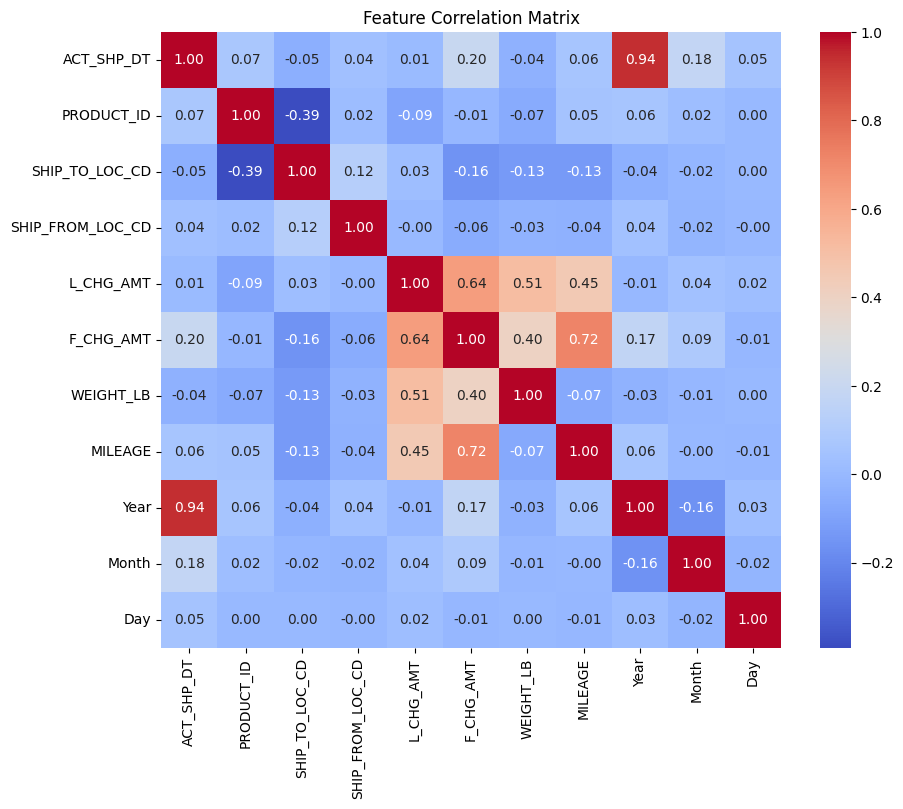

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train is your features DataFrame
# Calculate the correlation matrix
corr_matrix = dataset2.corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

Numerical features: L_CHG_AMT, WEIGHT_LB, MILEAGE

Target variable (also numerical): F_CHG_AMT

Categorical features that are numerically encoded: PRODUCT_ID, SHIP_TO_LOC_CD, SHIP_FROM_LOC_CD

Categorical time-based features: Year, Month, Day

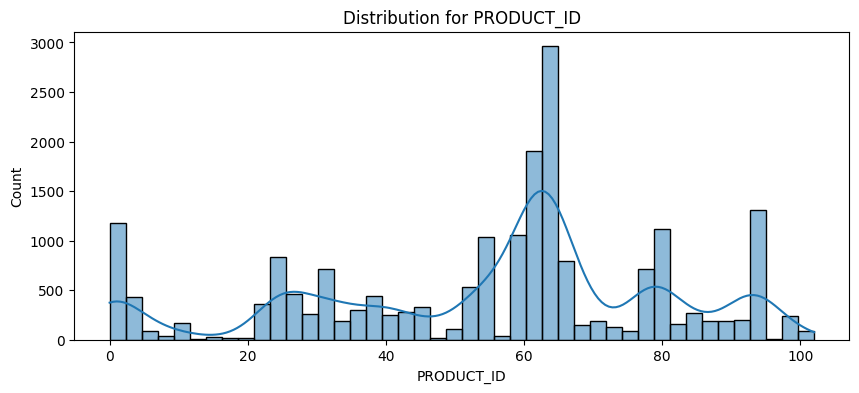

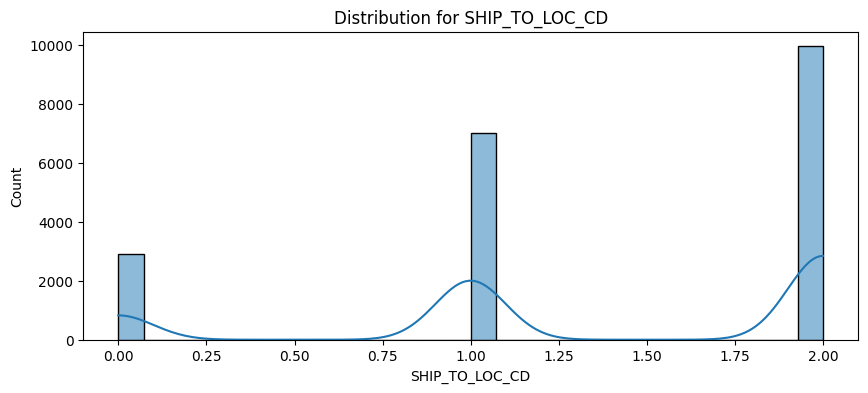

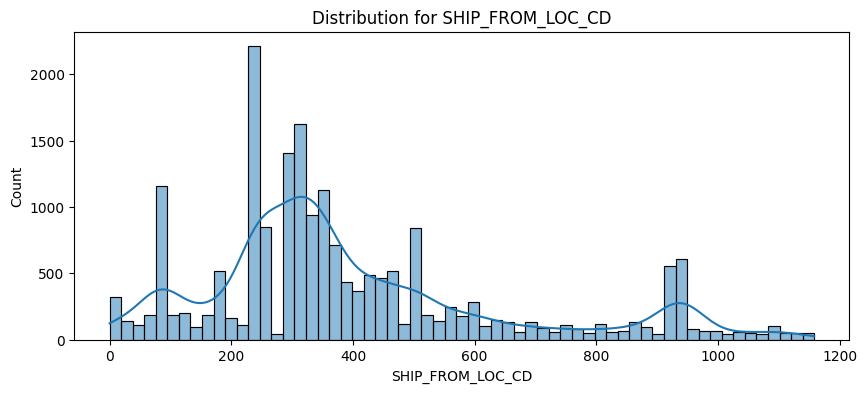

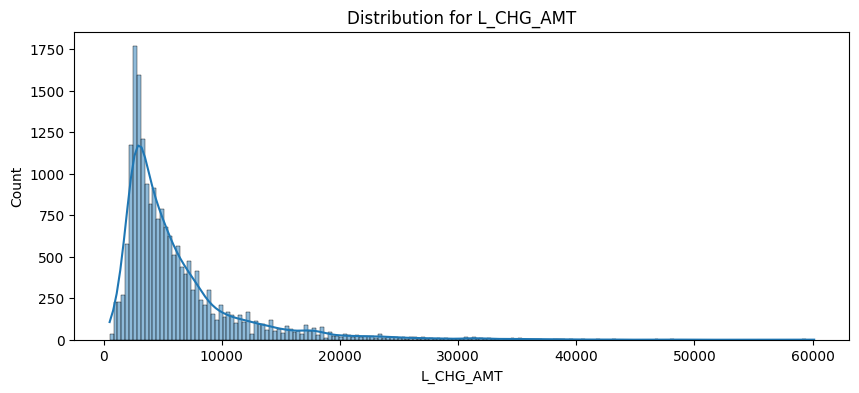

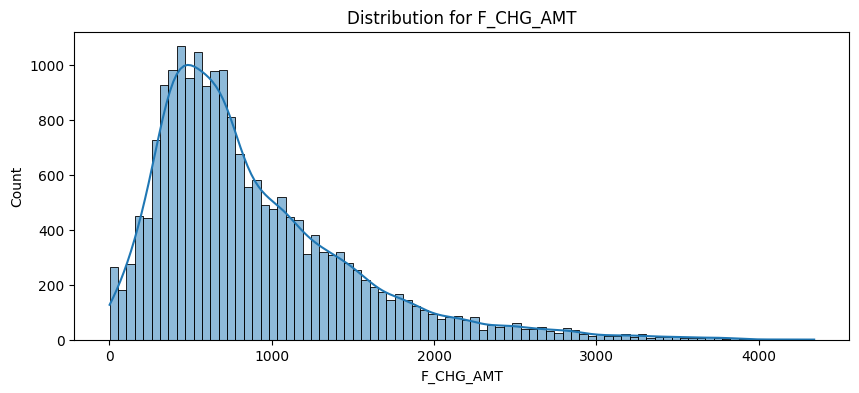

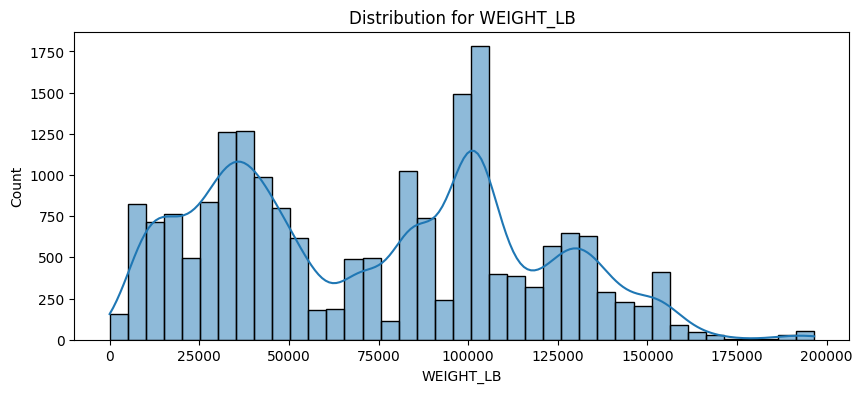

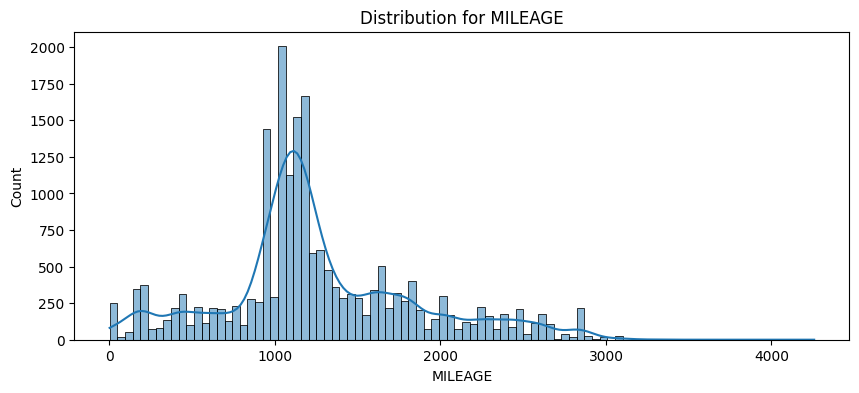

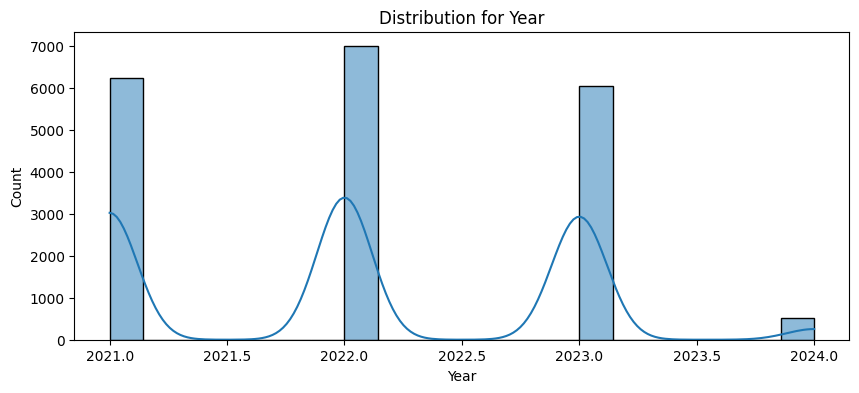

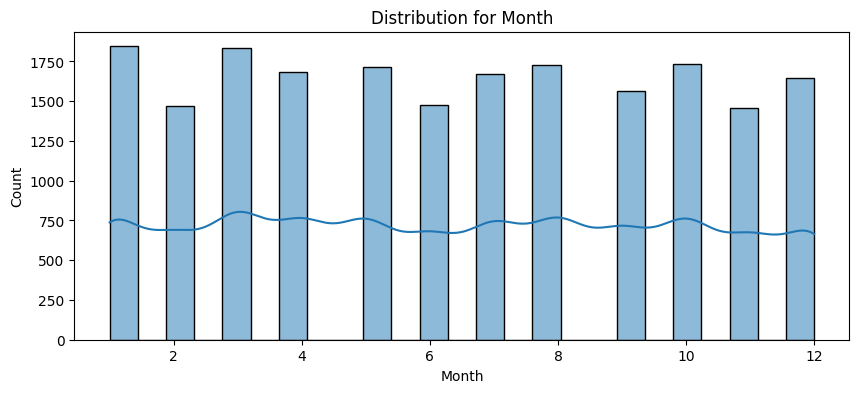

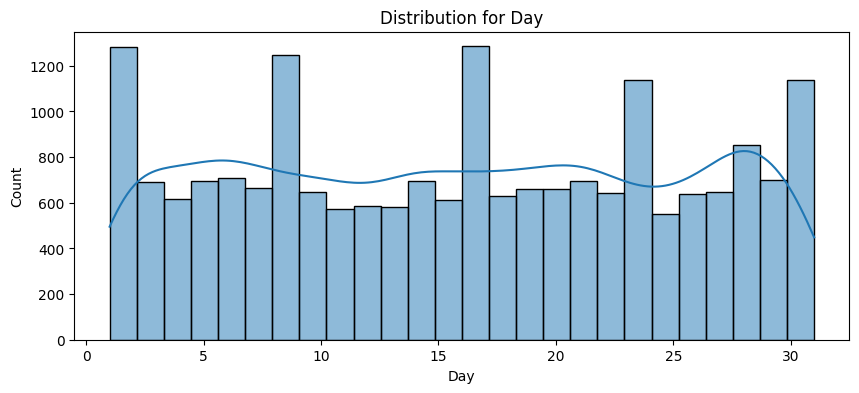

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Loop through each column in the DataFrame
for column in dataset2.columns:
    # Check if the column data type is numeric
    if pd.api.types.is_numeric_dtype(dataset2[column]):
        plt.figure(figsize=(10, 4))
        sns.histplot(data=dataset2, x=column, kde=True)
        plt.title(f'Distribution for {column}')
        plt.show()


In [ ]:
import pandas as pd

# Example: Creating interaction and polynomial features
dataset2['Weight_x_Mileage'] = dataset2['WEIGHT_LB'] * dataset2['MILEAGE']
dataset2['Weight_LB^2'] = dataset2['WEIGHT_LB'] ** 2

In [ ]:
dataset2

,ACT_SHP_DT,PRODUCT_ID,SHIP_TO_LOC_CD,SHIP_FROM_LOC_CD,L_CHG_AMT,F_CHG_AMT,WEIGHT_LB,MILEAGE,Year,Month,Day,Weight_x_Mileage,Weight_LB^2
0,2021-01-08,0,2,922,2086,214.0,9444,983.0,2021,1,8,9283452.0,89189136
1,2021-01-08,0,2,922,3978,376.0,87021,983.0,2021,1,8,85541643.0,7572654441
2,2021-01-08,0,2,687,2700,261.0,9740,1200.0,2021,1,8,11688000.0,94867600
3,2021-01-11,0,2,687,4199,457.0,87012,1200.0,2021,1,11,104414400.0,7571088144
4,2021-01-12,0,2,88,4168,455.0,86203,1191.0,2021,1,12,102667773.0,7430957209
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19832,2023-12-20,7,1,337,2949,544.0,42384,1342.0,2023,12,20,56879328.0,1796403456
19833,2023-12-21,7,1,357,6129,1209.0,42384,2984.0,2023,12,21,126473856.0,1796403456
19834,2024-01-25,7,1,910,3643,528.0,42384,1459.0,2024,1,25,61838256.0,1796403456
19835,2024-02-01,7,1,361,4045,576.0,42384,1573.0,2024,2,1,66670032.0,1796403456


In [ ]:
import numpy as np

# Apply log transformation to the specified columns
dataset2['L_CHG_AMT'] = np.log1p(dataset2['L_CHG_AMT'])
dataset2['WEIGHT_LB'] = np.log1p(dataset2['WEIGHT_LB'])
dataset2['MILEAGE'] = np.log1p(dataset2['MILEAGE'])
dataset2['Weight_x_Mileage'] = np.log1p(dataset2['Weight_x_Mileage'])
dataset2['Weight_LB^2'] = np.log1p(dataset2['Weight_LB^2'])


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming dataset2 is your DataFrame
# Initialize the StandardScaler
scaler = StandardScaler()

# Select only the numerical columns for scaling
numerical_columns = ['L_CHG_AMT', 'WEIGHT_LB', 'MILEAGE']

# Fit and transform the numerical columns
dataset2[numerical_columns] = scaler.fit_transform(dataset2[numerical_columns])

# Check the normalized data
print(dataset2[numerical_columns].head())


   L_CHG_AMT  WEIGHT_LB   MILEAGE
0  -1.256436  -2.194055 -0.083725
1  -0.301340   0.524492 -0.083725
2  -0.874733  -2.156279  0.165816
3  -0.221336   0.524365  0.165816
4  -0.232301   0.512930  0.156397


In [ ]:
import pandas as pd

# Example using quantiles to define bins
num_bins = 4  # You can adjust the number of bins based on your analysis needs

weight_bins = pd.qcut(dataset2['WEIGHT_LB'], q=num_bins, labels=False, duplicates='drop')  # Labels=False gives you integer encoded bins
mileage_bins = pd.qcut(dataset2['MILEAGE'], q=num_bins, labels=False, duplicates='drop')

# Add binned data to the DataFrame
dataset2['WEIGHT_LB_binned'] = weight_bins
dataset2['MILEAGE_binned'] = mileage_bins

# Check the first few rows to see the binned data
print(dataset2[['WEIGHT_LB', 'WEIGHT_LB_binned', 'MILEAGE', 'MILEAGE_binned']].head())


   WEIGHT_LB  WEIGHT_LB_binned   MILEAGE  MILEAGE_binned
0  -2.194055                 0 -0.083725               1
1   0.524492                 2 -0.083725               1
2  -2.156279                 0  0.165816               2
3   0.524365                 2  0.165816               2
4   0.512930                 2  0.156397               2


# using kmeans to identify new features

In [ ]:
dataset2

,ACT_SHP_DT,PRODUCT_ID,SHIP_TO_LOC_CD,SHIP_FROM_LOC_CD,L_CHG_AMT,F_CHG_AMT,WEIGHT_LB,MILEAGE,Year,Month,Day,Weight_x_Mileage,Weight_LB^2,WEIGHT_LB_binned,MILEAGE_binned
0,2021-01-08,0,2,922,-1.256436,214.0,-2.194055,-0.083725,2021,1,8,16.043744,18.306270,0,1
1,2021-01-08,0,2,922,-0.301340,376.0,0.524492,-0.083725,2021,1,8,18.264514,22.747809,2,1
2,2021-01-08,0,2,687,-0.874733,261.0,-2.156279,0.165816,2021,1,8,16.274073,18.367993,0,2
3,2021-01-11,0,2,687,-0.221336,457.0,0.524365,0.165816,2021,1,11,18.463878,22.747603,2,2
4,2021-01-12,0,2,88,-0.232301,455.0,0.512930,0.156397,2021,1,12,18.447009,22.728921,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19832,2023-12-20,7,1,337,-0.744216,544.0,-0.356155,0.305750,2023,12,20,17.856443,21.309052,1,2
19833,2023-12-21,7,1,357,0.338295,1209.0,-0.356155,1.305865,2023,12,21,18.655546,21.309052,1,3
19834,2024-01-25,7,1,910,-0.431510,528.0,-0.356155,0.410346,2024,1,25,17.940033,21.309052,1,2
19835,2024-02-01,7,1,361,-0.276625,576.0,-0.356155,0.504490,2024,2,1,18.015266,21.309052,1,2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the features for transformation
numeric_features = ['WEIGHT_LB', 'MILEAGE']  # Numeric features
categorical_features = ['SHIP_TO_LOC_CD', 'SHIP_FROM_LOC_CD']  # Categorical features

# Create transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Fit and transform the features
clustering_features = dataset2[numeric_features + categorical_features]
clustering_scaled = preprocessor.fit_transform(clustering_features)

# Apply k-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust number of clusters as necessary
clusters = kmeans.fit_predict(clustering_scaled)

# Add cluster labels to the dataset
dataset2['Cluster_Label'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'clustering_scaled' is your preprocessed data ready for clustering
distortions = []
K = range(1, 10)  # Example: Checking for 1 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_scaled)
    distortions.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


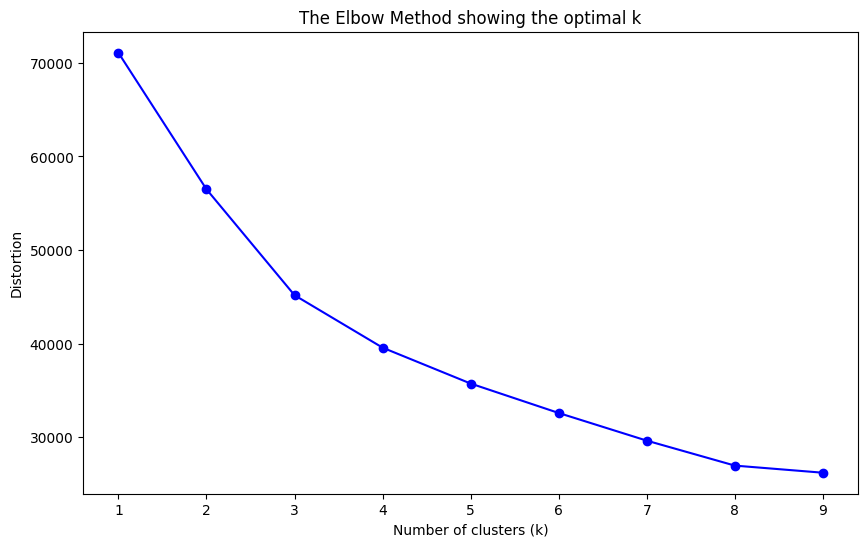

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Assuming 'clustering_scaled' is your preprocessed data ready for clustering
kmeans = KMeans(n_clusters=3, random_state=42)
dataset2['Cluster_Label'] = kmeans.fit_predict(clustering_scaled)

# Output the cluster labels to see the assignment
print(dataset2['Cluster_Label'].head())


0    1
1    0
2    1
3    0
4    0
Name: Cluster_Label, dtype: int32


In [ ]:
# Analyze cluster centers and the count of data points per cluster
import pandas as pd

# Display the count of data points in each cluster
print(dataset2['Cluster_Label'].value_counts())

# Calculate mean values of original features per cluster
cluster_means = dataset2.groupby('Cluster_Label').mean()
print(cluster_means)


Cluster_Label
0    10818
1     7787
2     1232
Name: count, dtype: int64
                                 ACT_SHP_DT  PRODUCT_ID  SHIP_TO_LOC_CD  \
Cluster_Label                                                             
0             2022-07-07 11:44:25.557404416   53.956924        1.183860   
1             2022-08-04 10:41:07.805316352   55.685373        1.643637   
2             2022-05-07 20:27:16.363636480   56.751623        1.043019   

               SHIP_FROM_LOC_CD  L_CHG_AMT    F_CHG_AMT  WEIGHT_LB   MILEAGE  \
Cluster_Label                                                                  
0                    388.200869   0.552634  1174.140044   0.644494  0.214913   
1                    418.775138  -0.604231   582.408887  -1.026310  0.162987   
2                    374.019481  -1.033481   157.163149   0.827709 -2.917300   

                      Year     Month        Day  Weight_x_Mileage  \
Cluster_Label                                                       
0           

In [ ]:
dataset2

,ACT_SHP_DT,PRODUCT_ID,SHIP_TO_LOC_CD,SHIP_FROM_LOC_CD,L_CHG_AMT,F_CHG_AMT,WEIGHT_LB,MILEAGE,Year,Month,Day,Weight_x_Mileage,Weight_LB^2,WEIGHT_LB_binned,MILEAGE_binned,Cluster_Label
0,2021-01-08,0,2,922,-1.256436,214.0,-2.194055,-0.083725,2021,1,8,16.043744,18.306270,0,1,1
1,2021-01-08,0,2,922,-0.301340,376.0,0.524492,-0.083725,2021,1,8,18.264514,22.747809,2,1,0
2,2021-01-08,0,2,687,-0.874733,261.0,-2.156279,0.165816,2021,1,8,16.274073,18.367993,0,2,1
3,2021-01-11,0,2,687,-0.221336,457.0,0.524365,0.165816,2021,1,11,18.463878,22.747603,2,2,0
4,2021-01-12,0,2,88,-0.232301,455.0,0.512930,0.156397,2021,1,12,18.447009,22.728921,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19832,2023-12-20,7,1,337,-0.744216,544.0,-0.356155,0.305750,2023,12,20,17.856443,21.309052,1,2,1
19833,2023-12-21,7,1,357,0.338295,1209.0,-0.356155,1.305865,2023,12,21,18.655546,21.309052,1,3,1
19834,2024-01-25,7,1,910,-0.431510,528.0,-0.356155,0.410346,2024,1,25,17.940033,21.309052,1,2,1
19835,2024-02-01,7,1,361,-0.276625,576.0,-0.356155,0.504490,2024,2,1,18.015266,21.309052,1,2,1


                  ACT_SHP_DT  PRODUCT_ID  SHIP_TO_LOC_CD  SHIP_FROM_LOC_CD  \
ACT_SHP_DT          1.000000    0.069900       -0.047388          0.035253   
PRODUCT_ID          0.069900    1.000000       -0.393035          0.015434   
SHIP_TO_LOC_CD     -0.047388   -0.393035        1.000000          0.120545   
SHIP_FROM_LOC_CD    0.035253    0.015434        0.120545          1.000000   
L_CHG_AMT           0.015986   -0.092893       -0.021068         -0.005066   
F_CHG_AMT           0.198958   -0.008964       -0.155920         -0.058647   
WEIGHT_LB          -0.045003    0.009671       -0.199629         -0.044938   
MILEAGE             0.068768    0.019523        0.009797          0.000685   
Year                0.942649    0.062588       -0.041714          0.041904   
Month               0.177104    0.022288       -0.017501         -0.018942   
Day                 0.048138    0.000013        0.001809         -0.001303   
Weight_x_Mileage    0.017904    0.021863       -0.141501        

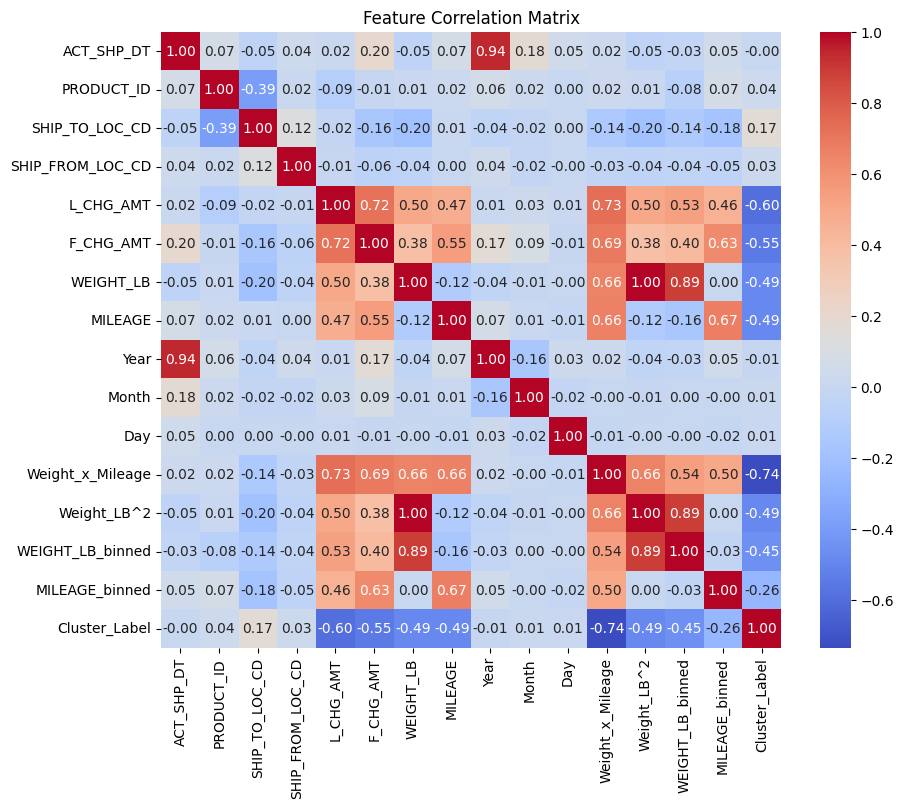

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train is your features DataFrame
# Calculate the correlation matrix
corr_matrix = dataset2.corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Modelling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import mean_squared_error





In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Categorical features needing encoding
categorical_features = ['PRODUCT_ID', 'SHIP_TO_LOC_CD', 'SHIP_FROM_LOC_CD', 'Month', 'Day', 'WEIGHT_LB_binned', 'MILEAGE_binned', 'Cluster_Label']
# Numerical features needing scaling
numerical_features = ['WEIGHT_LB', 'MILEAGE', 'Weight_x_Mileage', 'Weight_LB^2']

# Create the preprocessing pipeline for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Set handle_unknown to 'ignore'
    ])

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Creating a dictionary of models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, objective='reg:squarederror', random_state=42),
    'Linear Regression': LinearRegression()
}

# Pipelines
model_pipelines = {name: Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ]) for name, model in models.items()}


In [ ]:
# Define a cutoff date for splitting the data
cutoff_date = pd.Timestamp('2023-02-07')

# Split the data into training and testing based on the cutoff date
train = dataset2[dataset2['ACT_SHP_DT'] < cutoff_date]
test = dataset2[dataset2['ACT_SHP_DT'] >= cutoff_date]

In [ ]:
# Preparing the feature matrices and target vectors, including date features
X_train = train.drop(['ACT_SHP_DT', 'F_CHG_AMT'], axis=1)
y_train = train['F_CHG_AMT']
X_test = test.drop(['ACT_SHP_DT', 'F_CHG_AMT'], axis=1)
y_test = test['F_CHG_AMT']
# Fit, predict, and evaluate each model
for name, pipeline in model_pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'{name} RMSE: {rmse}')

Random Forest RMSE: 248.24386820437465
Gradient Boosting RMSE: 195.09698991174662
XGBoost RMSE: 246.40994800737136
Linear Regression RMSE: 295.4278903952883


In [ ]:
X_train

,PRODUCT_ID,SHIP_TO_LOC_CD,SHIP_FROM_LOC_CD,L_CHG_AMT,WEIGHT_LB,MILEAGE,Year,Month,Day,Weight_x_Mileage,Weight_LB^2,WEIGHT_LB_binned,MILEAGE_binned,Cluster_Label
0,0,2,922,-1.256436,-2.194055,-0.083725,2021,1,8,16.043744,18.306270,0,1,1
1,0,2,922,-0.301340,0.524492,-0.083725,2021,1,8,18.264514,22.747809,2,1,0
2,0,2,687,-0.874733,-2.156279,0.165816,2021,1,8,16.274073,18.367993,0,2,1
3,0,2,687,-0.221336,0.524365,0.165816,2021,1,11,18.463878,22.747603,2,2,0
4,0,2,88,-0.232301,0.512930,0.156397,2021,1,12,18.447009,22.728921,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19822,32,1,792,0.151724,0.762113,0.063761,2021,4,29,18.576515,23.136020,3,1,0
19823,32,1,302,-0.173828,0.736675,0.208858,2021,4,30,18.671709,23.094461,2,2,0
19824,32,1,77,0.804397,0.752646,0.677352,2021,4,30,19.059146,23.120553,3,3,0
19825,32,1,414,0.393044,0.704130,0.490087,2021,4,30,18.869876,23.041291,2,2,0


Hyperparameter tuning using training data

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Set up the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize the GradientBoostingRegressor
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Set up the GridSearchCV object
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
best_rmse = np.sqrt(-grid_search.best_score_)
print("Best RMSE from GridSearchCV:", best_rmse)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
Best RMSE from GridSearchCV: 63.045492134694946


Validating model's effectiveness

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Best parameters from GridSearchCV
best_params = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}

# Initialize the model with the best parameters
model = GradientBoostingRegressor(**best_params, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse}')


Test RMSE: 410.9106096008284


Hyperparameter tuning did not work as intended